<a href="https://colab.research.google.com/github/gsahinpi/dots511spr2020/blob/master/bayesandmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Bayes Rule<h1>
$$P(A|B) = \dfrac{P(B|A)}{P(A)}$$

But we will interpret as 
$$P(model|data) = \dfrac{P(data|model)}{P(data)}.P(model)$$




In [0]:
!pip install arviz

     |████████████████████████████████| 1.5MB 5.1MB/s 
     |████████████████████████████████| 4.1MB 38.5MB/s 
     |████████████████████████████████| 337kB 52.2MB/s 


In [0]:
!pip install watermark

In [0]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [0]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
az.style.use('arviz-darkgrid')

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


You’re handed one of the two decks, but you don’t know which.

1.   First, you draw the top card and note the value.
2.   Second, you replace the card and reshuffle the deck. 


You repeat this procedure of drawing, noting, and reshuffling for as many turns as you need. 
The goal is to determine which of the the two decks (High or Low) you are in fact holding in your hand.

Think of the first moment you are handed the one of the two decks . **Which deck are you holding?**
Prior to we see no data ie, we have not drawn any cards:


> p(High)=0.5


> p(Low)=0.5




**What is the model?**


Assume you have drawn a 9?


*   $$P(Highdeck|9)=?$$
*   $$P(Low deck|9)=?$$








P(H|data = 9 then a 7) ∼ P(data = 7|H)P(H, 9)<br>
P(L|data = 9 then a 7) ∼ P(data = 7|L)P(L, 9) 
 

Suppose you have a globe representing our planet, the Earth. This version of the world is small enough to hold in your hands. You are curious how much of the surface is covered in water. You adopt the following strategy: You will toss the globe up in the air. When you catch it, you will record whether or not the surface under your right index finger is water or land. Then you toss the globe up in the air again and repeat the procedure.This strategy generates a sequence of surface samples from the globe. The first nine samples might look like:


> WLWWWLWLW

Model(s): f (fraction) percent of the world is covered with water?
First observation:W


 
   

*    $$P(f=0.0|data=W) = \dfrac{P(data=w|f=0)}{P(data)}.P(f)$$
*   $$P(f=0.1|data=W)$$=


*  

*   
*   


*   $$P(f=1|data=W)$$

What is the **prior?**


What is the **likelyhood ?**

What is the probability of observing observing a "W" if the propabilty is f?
 









Binomial Distribution
$$Pr(w \mid n, p) =  \frac{n!}{w!(n − w)!} p^w (1 − p)^{n−w}$$


The probability of observing six W’s in nine tosses—under a value of p=0.5

In [0]:
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000006

In [0]:
p_grid = np.linspace(0, 1, 5)

In [0]:
p_grid

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [0]:
prior = np.repeat(5, 5)

In [0]:
likelihood = stats.binom.pmf(6, 9, np.linspace(0,1,5))
likelihood

array([0.        , 0.00865173, 0.1640625 , 0.2335968 , 0.        ])

In [0]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform Repeat elements of an array.
    # prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

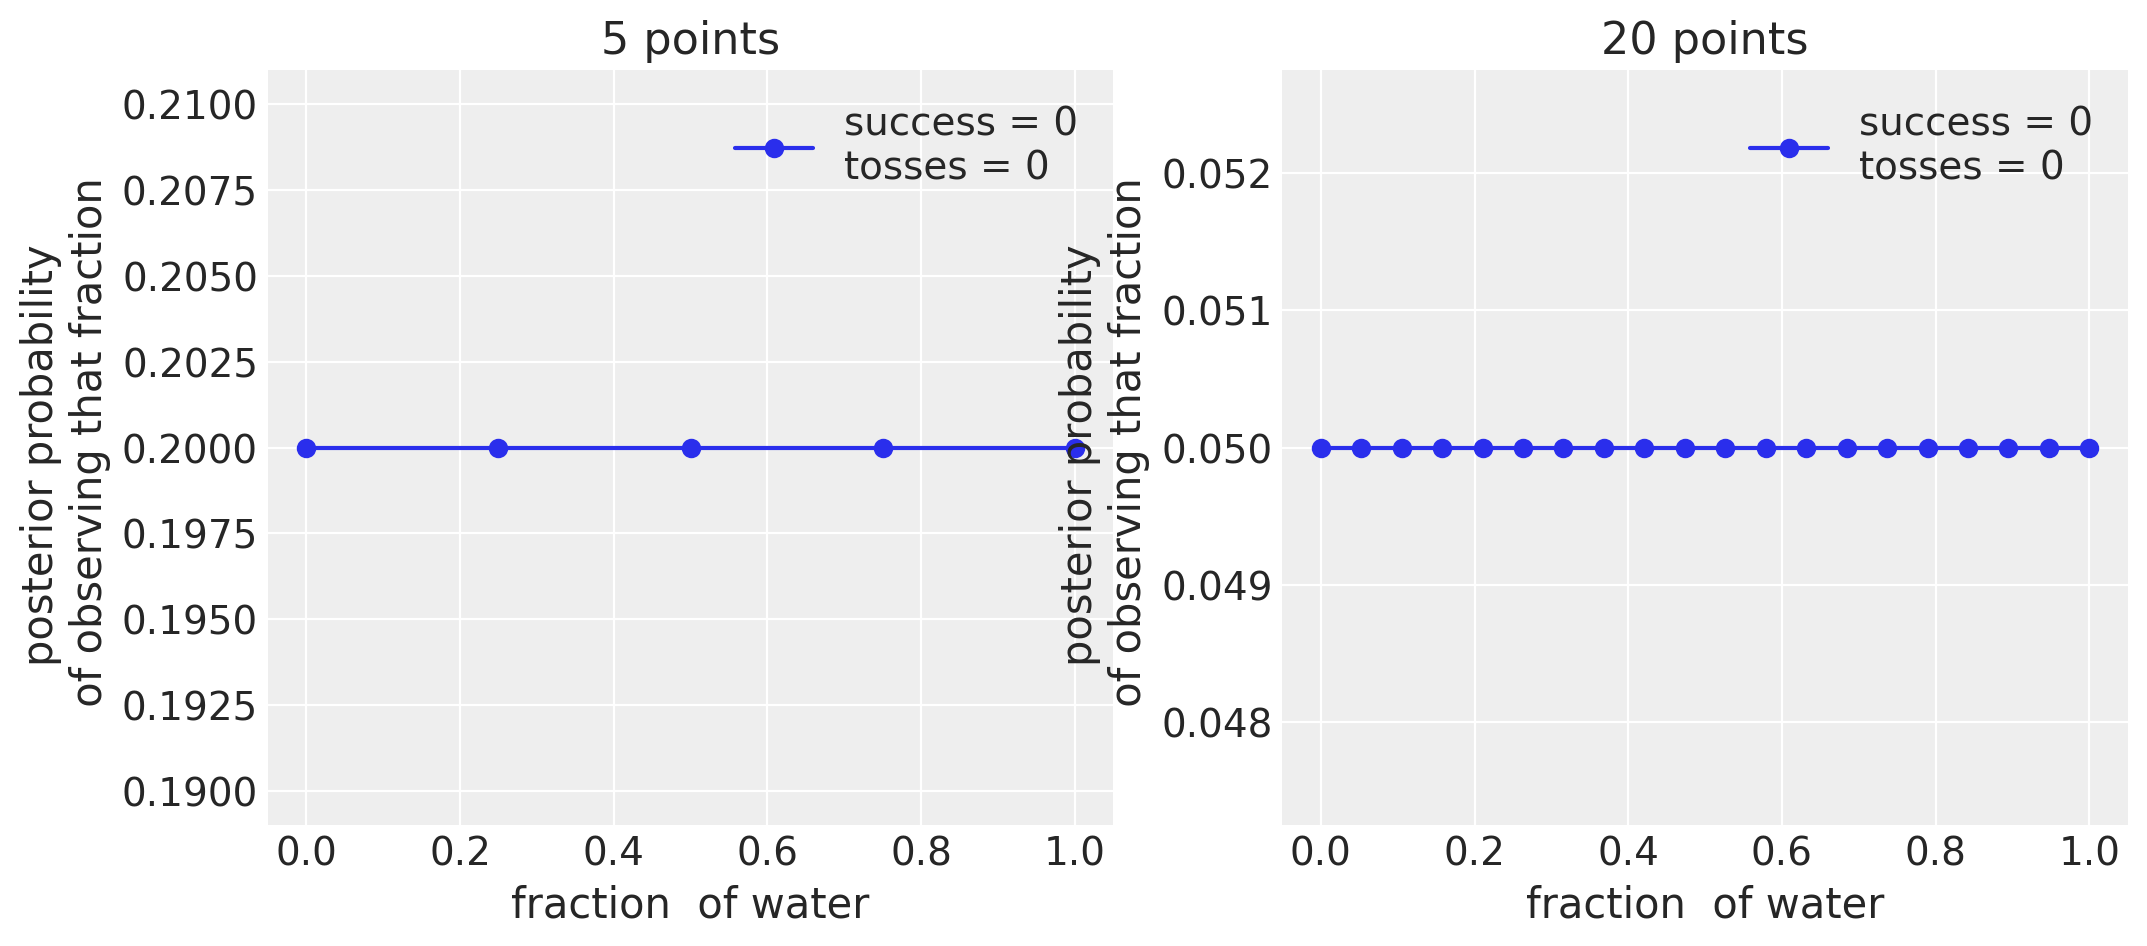

In [0]:
w, n = 0, 0 #6,9

_, ax = plt.subplots(1, 2, figsize=(12, 5))

points = (5, 20)
for idx, ps in enumerate(points):
    p_grid, posterior = posterior_grid_approx(ps, w, n)
    ax[idx].plot(p_grid, posterior, "o-", label=f"success = {w}\ntosses = {n}")
    ax[idx].set_xlabel("fraction  of water")
    ax[idx].set_ylabel("posterior probability \n of observing that fraction")
    ax[idx].set_title(f"{ps} points")
    ax[idx].legend(loc=0)

In [0]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_aproximation:
    p = pm.Uniform("p", 0, 1)
    w = pm.Binomial("w", n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1 / pm.find_hessian(mean_q, vars=[p])) ** 0.5)[0]
mean_q["p"], std_q

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1.8075, ||grad|| = 1.5: 100%|██████████| 7/7 [00:00<00:00, 643.38it/s]


(array(0.66666667), array([0.15713484]))

Text(0.5, 0.98, 'Posterior Approximation through Quadratic Approximation')

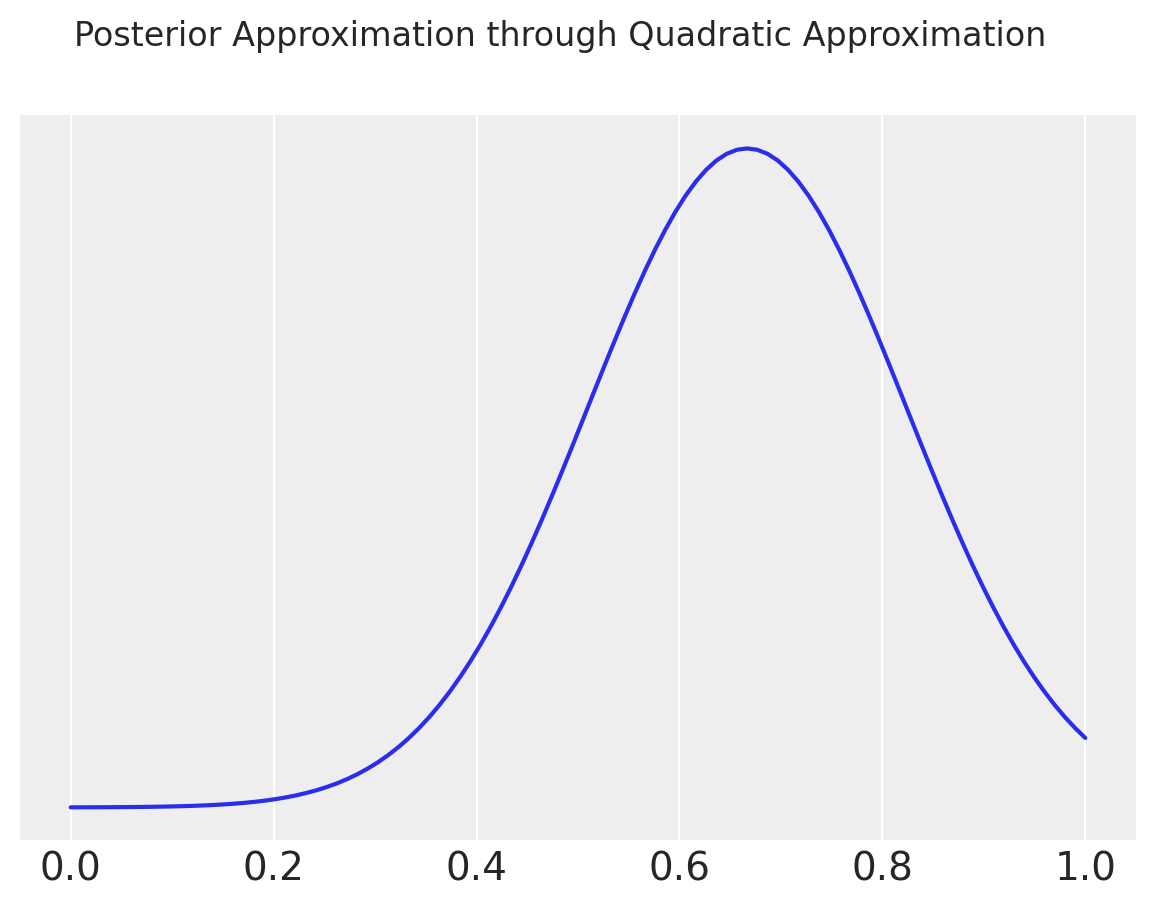

In [31]:
possible_probabilities = np.linspace(0,1,100)
posterior_laplace = stats.norm.pdf(possible_probabilities, mean_q['p'], std_q)
fig, ax = plt.subplots()
ax.set_yticks([])
plt.plot(possible_probabilities, posterior_laplace)
fig.suptitle("Posterior Approximation through Quadratic Approximation")